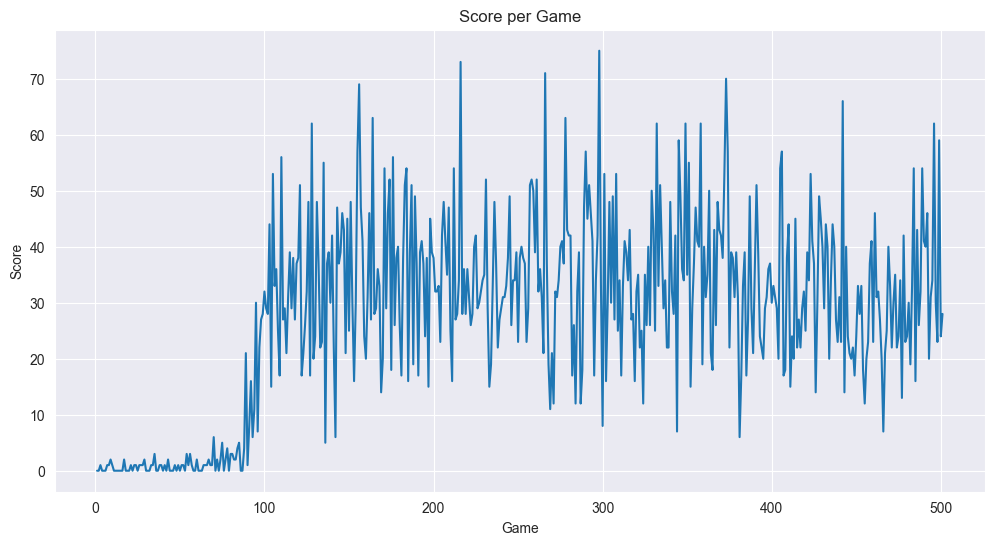

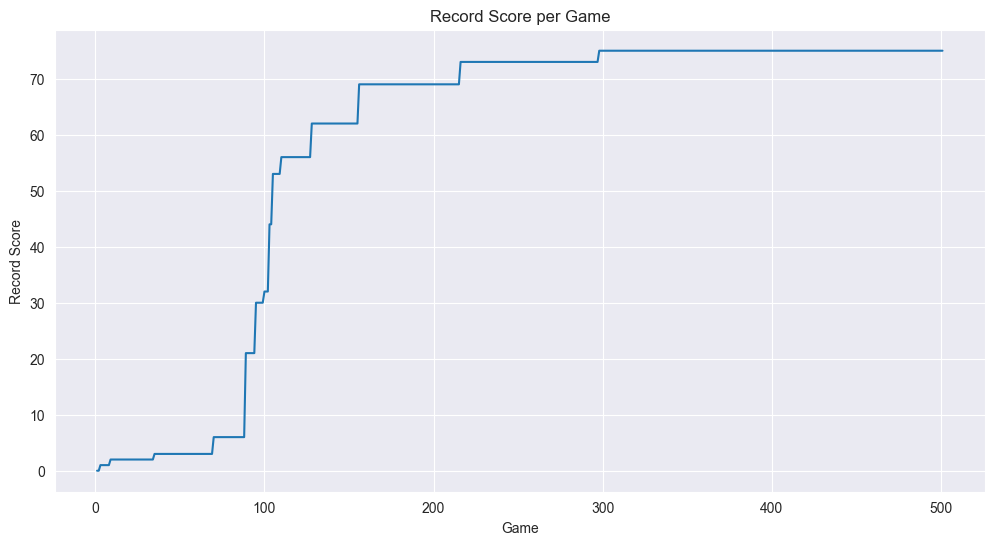

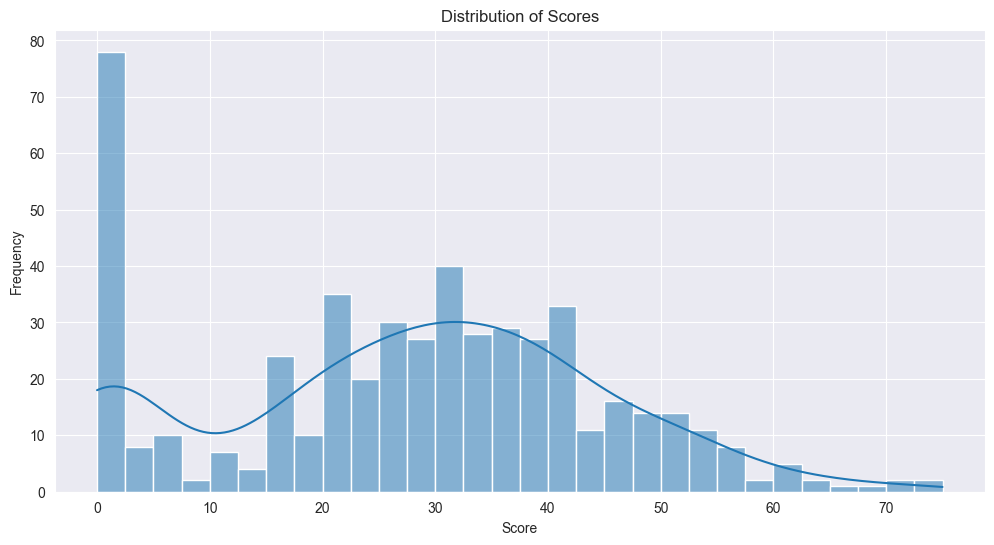

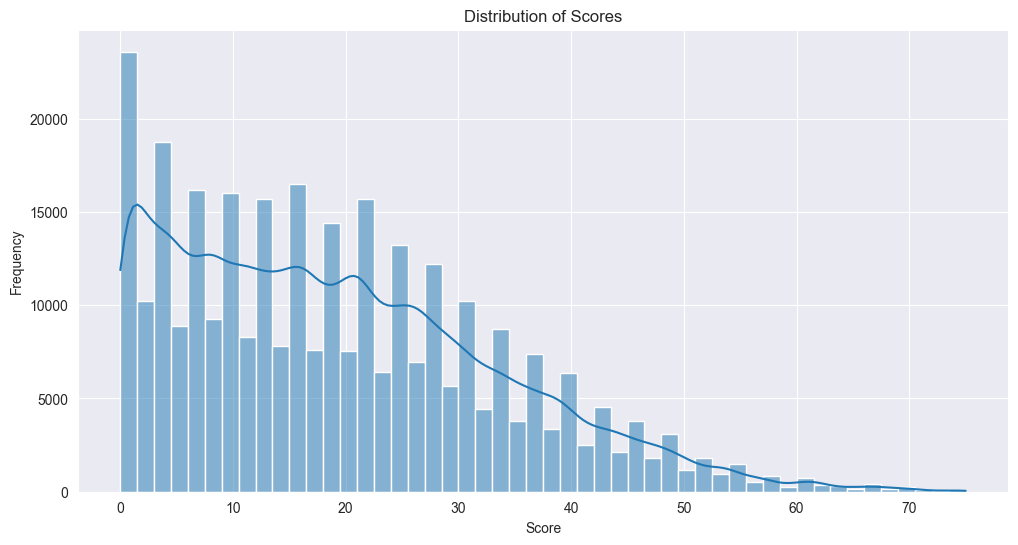

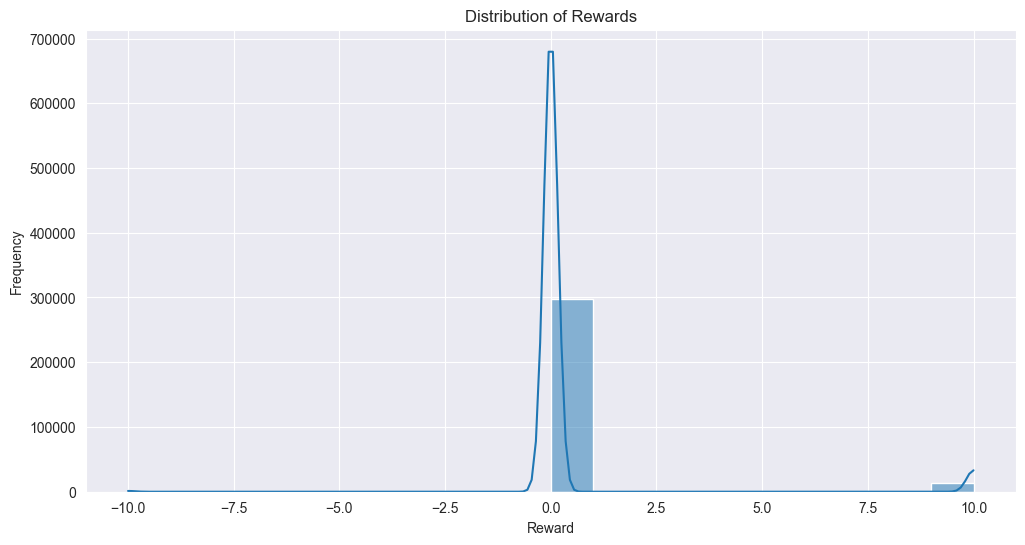

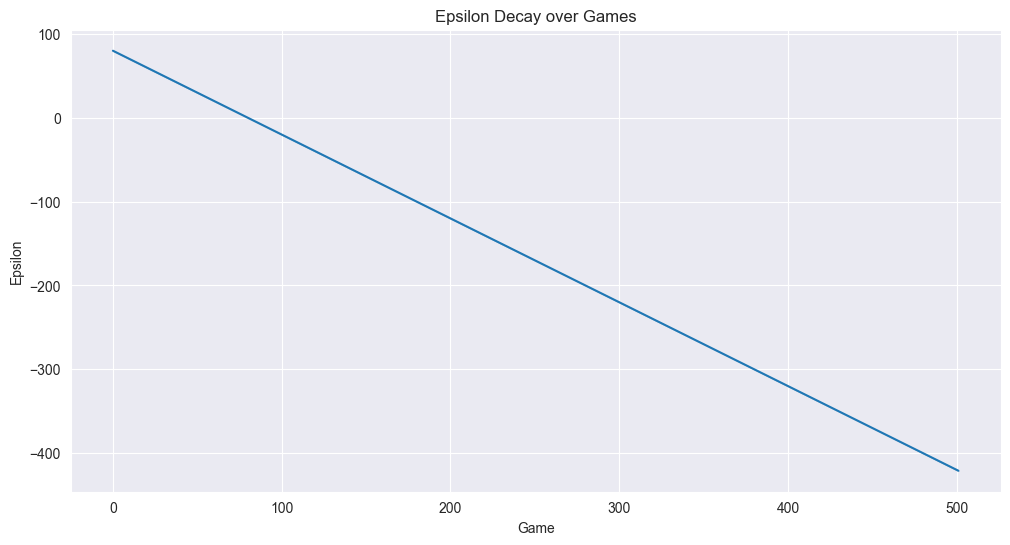

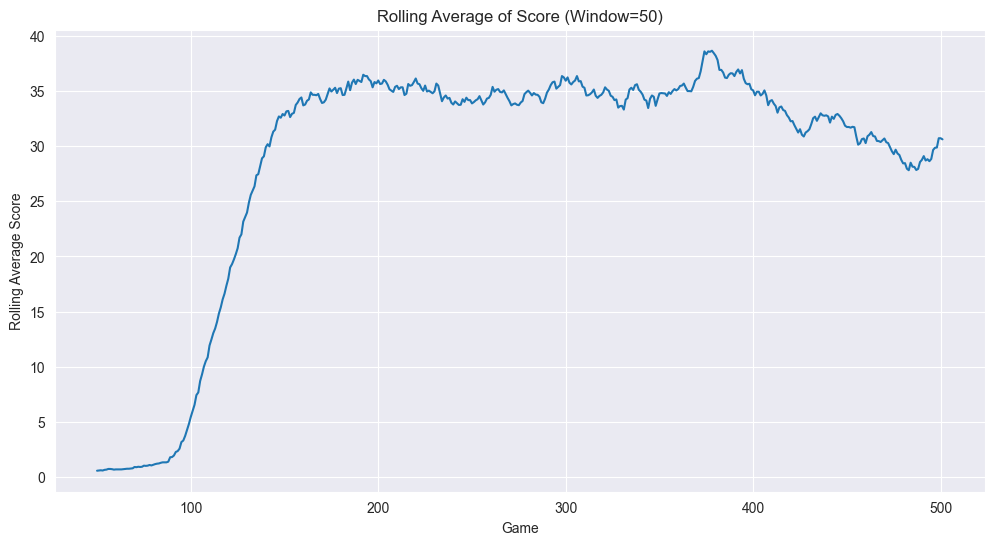

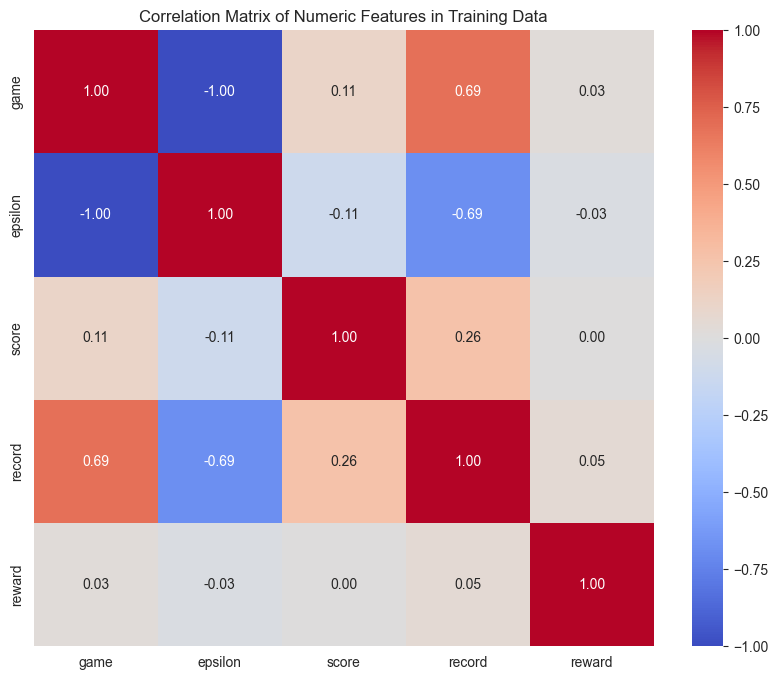

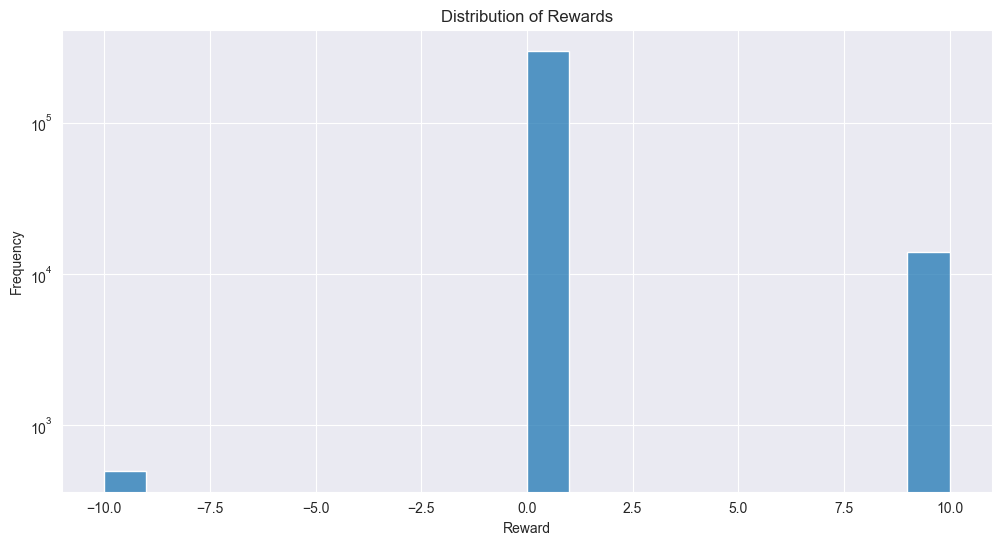

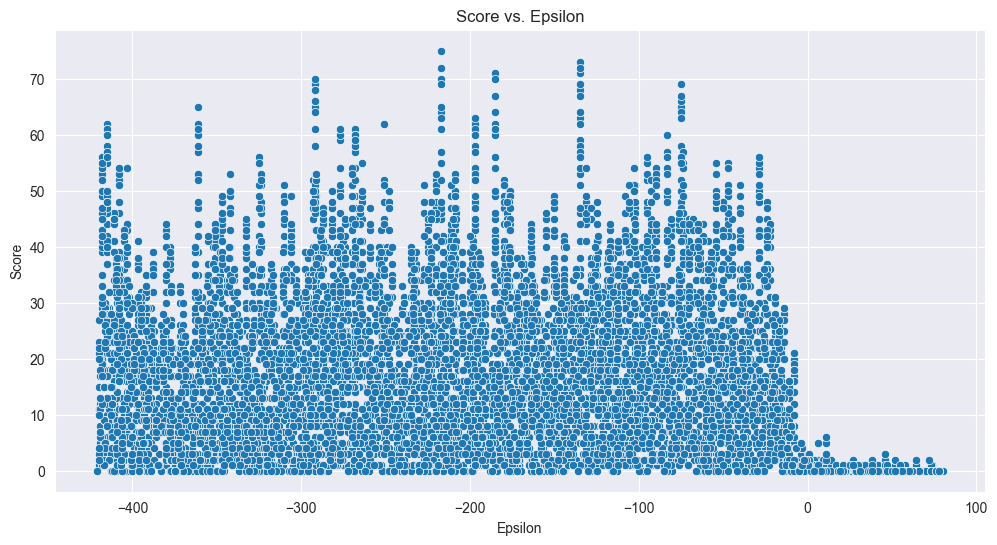

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
try:
    game_df = pd.read_csv('game.csv')
    training_df = pd.read_csv('training_data.csv')
except FileNotFoundError:
    print("Make sure 'game.csv' and 'training_data.csv' are in the same directory.")
    exit()

# --- Analysis of game.csv ---

# Score per Game
plt.figure(figsize=(12, 6))
sns.lineplot(x='Game', y='Score', data=game_df)
plt.title('Score per Game')
plt.xlabel('Game')
plt.ylabel('Score')
plt.grid(True)
plt.savefig('score_per_game.png')

# Record Score per Game
plt.figure(figsize=(12, 6))
sns.lineplot(x='Game', y='Record', data=game_df)
plt.title('Record Score per Game')
plt.xlabel('Game')
plt.ylabel('Record Score')
plt.grid(True)
plt.savefig('record_score_per_game.png')

# Score Distribution
plt.figure(figsize=(12, 6))
sns.histplot(game_df['Score'], bins=30, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('score_distribution.png')


# --- Analysis of training_data.csv ---
# --- Analysis of training_data.csv ---

# Score Distribution
plt.figure(figsize=(12, 6))
sns.histplot(training_data['score'], bins=50, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('score_distribution.png')

# Reward Distribution
plt.figure(figsize=(12, 6))
sns.histplot(training_data['reward'], bins=20, kde=True)
plt.title('Distribution of Rewards')
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('reward_distribution.png')

# Epsilon over Games (using training_data)
plt.figure(figsize=(12, 6))
sns.lineplot(x='game', y='epsilon', data=training_data)
plt.title('Epsilon Decay over Games')
plt.xlabel('Game')
plt.ylabel('Epsilon')
plt.grid(True)
plt.savefig('epsilon_decay.png')

# Rolling Average of Score
game_data['Rolling_Avg_Score'] = game_data['Score'].rolling(window=50).mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Game', y='Rolling_Avg_Score', data=game_data)
plt.title('Rolling Average of Score (Window=50)')
plt.xlabel('Game')
plt.ylabel('Rolling Average Score')
plt.grid(True)
plt.savefig('rolling_average_score.png')

# Correlation heatmap
plt.figure(figsize=(10, 8))
# For the heatmap, we can only use numeric columns from the training_data.
# The 'state', 'action', and 'next_state' columns are string representations of lists,
# and 'done' is boolean. Let's exclude them for the correlation matrix.
numeric_training_data = training_data.select_dtypes(include=['number'])
correlation_matrix = numeric_training_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features in Training Data')
plt.savefig('correlation_heatmap.png')


# Reward Distribution
plt.figure(figsize=(12, 6))
sns.histplot(training_df['reward'], bins=20, kde=False)
plt.title('Distribution of Rewards')
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.yscale('log') # Use log scale to see the less frequent rewards
plt.grid(True)
plt.savefig('reward_distribution.png')

# Score vs. Epsilon
plt.figure(figsize=(12, 6))
sns.scatterplot(x='epsilon', y='score', data=training_df.sample(10000)) # Sample to avoid overplotting
plt.title('Score vs. Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Score')
plt.grid(True)
plt.savefig('score_vs_epsilon.png')